In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [36]:
main_table = pd.read_csv("MainTable.csv")
subjects_table = pd.read_csv("Subject.csv")

In [66]:
main_table.columns

Index(['Order', 'SubjectID', 'ToolInstances', 'ServerTimestamp',
       'ServerTimezone', 'CourseID', 'CourseSectionID', 'AssignmentID',
       'ProblemID', 'CodeStateID', 'IsEventOrderingConsistent', 'EventType',
       'Score', 'Compile.Result', 'CompileMessageType', 'CompileMessageData',
       'EventID', 'ParentEventID', 'SourceLocation'],
      dtype='object')

In [73]:
main_table.head(10)

,Order,SubjectID,ToolInstances,ServerTimestamp,ServerTimezone,CourseID,CourseSectionID,AssignmentID,ProblemID,CodeStateID,IsEventOrderingConsistent,EventType,Score,Compile.Result,CompileMessageType,CompileMessageData,EventID,ParentEventID,SourceLocation
0,119630,00c54f9462673d4c09d2a88121860841,Java 8; CodeWorkout,2019-02-24T05:13:03,UTC,CS 1,1,439.0,1,efdf3fae54cdc0a09fb81fcfa365c5f843e837b0,True,Run.Program,1.00,NaN,NaN,NaN,1-69176,NaN,NaN
1,119631,00c54f9462673d4c09d2a88121860841,Java 8; CodeWorkout,2019-02-24T05:13:03,UTC,CS 1,1,439.0,1,efdf3fae54cdc0a09fb81fcfa365c5f843e837b0,True,Compile,NaN,Success,NaN,NaN,1-69177,1-69176,NaN
2,134330,00c54f9462673d4c09d2a88121860841,Java 8; CodeWorkout,2019-02-24T05:13:33,0,CS 1,1,439.0,3,79b2bcc8f502e1f7d2d4e83d1894964684c89b85,True,Run.Program,1.00,NaN,NaN,NaN,3-68089,NaN,NaN
3,134331,00c54f9462673d4c09d2a88121860841,Java 8; CodeWorkout,2019-02-24T05:13:33,0,CS 1,1,439.0,3,79b2bcc8f502e1f7d2d4e83d1894964684c89b85,True,Compile,NaN,Success,NaN,NaN,3-68090,3-68089,NaN
4,65666,00c54f9462673d4c09d2a88121860841,Java 8; CodeWorkout,2019-02-24T05:09:54,UTC,CS 1,1,439.0,5,2697d299e7c5992f557ce38d8a04345112a11af8,True,Run.Program,0.75,NaN,NaN,NaN,5-35681,NaN,NaN
5,65667,00c54f9462673d4c09d2a88121860841,Java 8; CodeWorkout,2019-02-24T05:09:54,UTC,CS 1,1,439.0,5,2697d299e7c5992f557ce38d8a04345112a11af8,True,Compile,NaN,Success,NaN,NaN,5-35682,5-35681,NaN
6,65668,00c54f9462673d4c09d2a88121860841,Java 8; CodeWorkout,2019-02-24T05:10:31,UTC,CS 1,1,439.0,5,c86e57300992f1b39c415a0917a34740fee933e0,True,Run.Program,1.00,NaN,NaN,NaN,5-35683,NaN,NaN
7,65669,00c54f9462673d4c09d2a88121860841,Java 8; CodeWorkout,2019-02-24T05:10:31,UTC,CS 1,1,439.0,5,c86e57300992f1b39c415a0917a34740fee933e0,True,Compile,NaN,Success,NaN,NaN,5-35684,5-35683,NaN
8,37219,00c54f9462673d4c09d2a88121860841,Java 8; CodeWorkout,2019-02-24T05:14:37,0,CS 1,1,439.0,12,6e21cdd2b4a63610bd2a3e882ee772968ef82b3c,True,Run.Program,1.00,NaN,NaN,NaN,12-35708,NaN,NaN
9,37220,00c54f9462673d4c09d2a88121860841,Java 8; CodeWorkout,2019-02-24T05:14:37,0,CS 1,1,439.0,12,6e21cdd2b4a63610bd2a3e882ee772968ef82b3c,True,Compile,NaN,Success,NaN,NaN,12-35709,12-35708,NaN


In [38]:
subjects_table.head(5)

,SubjectID,X-Grade
0,65be44ae7088566069cc3bef454174a7,0.3600
1,0bdf2c1f053650715e1f0c725d754b96,0.3917
2,ad8d3a0a0f0a084a97fad357c649438c,0.6160
3,f4db8537e9d75da46c4efc36a2d70956,0.4310
4,d7419ae04f248e5105ac3d0700389775,0.7244


In [67]:

problem_counts = main_table.groupby(['SubjectID', 'ProblemID']).size().reset_index(name='problem_count')

average_problems = problem_counts.groupby('SubjectID')['problem_count'].mean().reset_index(name='average_problems')
result_df = pd.merge(subjects_table, average_problems, on='SubjectID', how='left')
result_df = result_df[result_df["X-Grade"] != 0]
result_df.head(5)


,SubjectID,X-Grade,average_problems
0,65be44ae7088566069cc3bef454174a7,0.3600,7.000000
1,0bdf2c1f053650715e1f0c725d754b96,0.3917,16.384615
2,ad8d3a0a0f0a084a97fad357c649438c,0.6160,10.200000
3,f4db8537e9d75da46c4efc36a2d70956,0.4310,7.160000
4,d7419ae04f248e5105ac3d0700389775,0.7244,27.305556


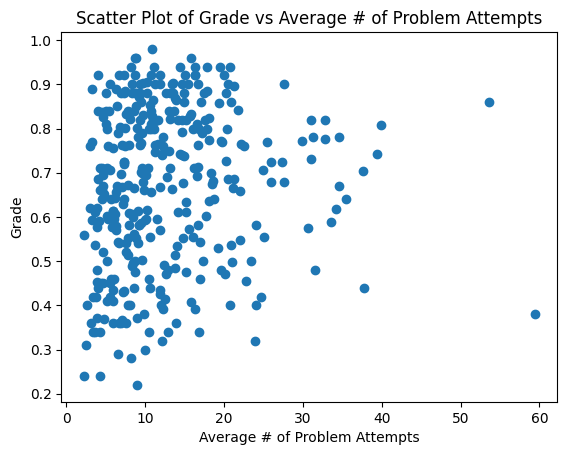

In [68]:
plt.scatter(result_df["average_problems"], result_df["X-Grade"])

plt.xlabel("Average # of Problem Attempts")
plt.ylabel("Grade")
plt.title("Scatter Plot of Grade vs Average # of Problem Attempts")

plt.show()

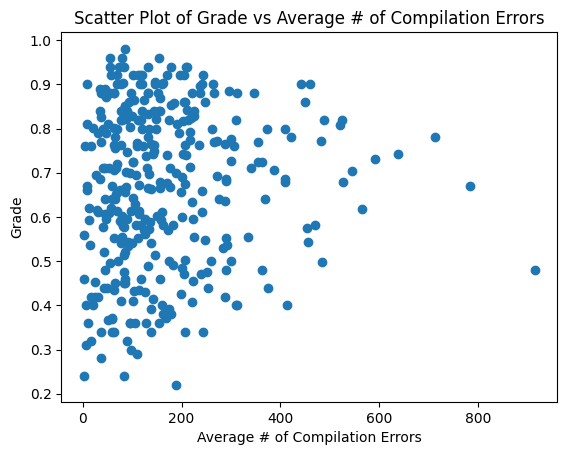

In [69]:

# Count occurrences of "Error" in Compile.Result for each SubjectID
error_counts = main_table[main_table["EventType"] == "Compile.Error"].groupby("SubjectID").size().reset_index(name="error_count")

# Compute the average number of errors per SubjectID
average_errors = error_counts.groupby("SubjectID")["error_count"].mean().reset_index(name="average_errors")

# Merge with subjects_table to retain SubjectID and grades
result_df = pd.merge(subjects_table, average_errors, on="SubjectID", how="left")

# Drop rows where 'X-Grade' is 0
result_df = result_df[result_df["X-Grade"] != 0]

# Scatter plot
plt.scatter(result_df["average_errors"], result_df["X-Grade"])

plt.xlabel("Average # of Compilation Errors")
plt.ylabel("Grade")
plt.title("Scatter Plot of Grade vs Average # of Compilation Errors")

plt.show()

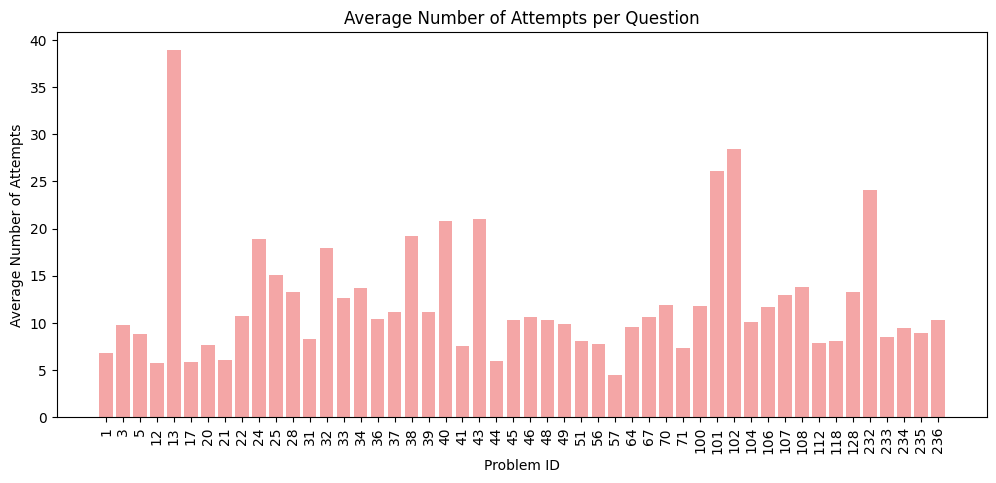

In [76]:
# Step 1: Count the number of attempts per problem
attempts_per_problem = main_table.groupby("ProblemID").size().reset_index(name="total_attempts")

# Step 2: Count the number of unique students who attempted each problem
unique_students_per_problem = main_table.groupby("ProblemID")["SubjectID"].nunique().reset_index(name="num_students")

# Step 3: Calculate the average number of attempts per student for each problem
average_attempts_per_problem = pd.merge(attempts_per_problem, unique_students_per_problem, on="ProblemID")
average_attempts_per_problem["avg_attempts_per_question"] = average_attempts_per_problem["total_attempts"] / average_attempts_per_problem["num_students"]

# Step 4: Plot the average attempts per problem
plt.figure(figsize=(12, 5))
plt.bar(average_attempts_per_problem["ProblemID"].astype(str), average_attempts_per_problem["avg_attempts_per_question"], color='lightcoral', alpha=0.7)

# Step 5: Add labels and title
plt.xlabel("Problem ID")
plt.ylabel("Average Number of Attempts")
plt.title("Average Number of Attempts per Question")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Step 6: Show the plot
plt.show()


In [85]:
import pandas as pd

# Step 1: Group the data by SubjectID and ProblemID to count the number of attempts
attempts_per_student_problem = main_table.groupby(['SubjectID', 'ProblemID']).size().reset_index(name='attempts')

# Step 2: Pivot the data to have SubjectID as rows and ProblemID as columns
attempts_per_student_problem_pivot = attempts_per_student_problem.pivot(index='SubjectID', columns='ProblemID', values='attempts').fillna(0)

# Step 3: Display the DataFrame with the number of attempts per student per problem
attempts_per_student_problem_pivot.head()


ProblemID,1,3,5,12,13,17,20,21,22,24,...,107,108,112,118,128,232,233,234,235,236
SubjectID,,,,,,,,,,,,,,,,,,,,,
00c54f9462673d4c09d2a88121860841,2.0,2.0,4.0,4.0,17.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,2.0,30.0,2.0,2.0,2.0,2.0
033ee034918011e4e34a7f97d464261f,0.0,0.0,0.0,0.0,16.0,2.0,9.0,2.0,2.0,15.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
036ad3e516c5bf3a4b3be35b137bcbb8,40.0,15.0,16.0,6.0,63.0,11.0,79.0,7.0,19.0,75.0,...,37.0,4.0,11.0,12.0,48.0,57.0,2.0,8.0,2.0,9.0
04c32d4d95425f73b3a1d6502aed4d48,2.0,4.0,8.0,2.0,4.0,2.0,4.0,2.0,14.0,2.0,...,11.0,28.0,71.0,11.0,37.0,37.0,66.0,19.0,6.0,6.0
0503bf609757acf2e75aa8cbc0d8323b,4.0,9.0,2.0,2.0,5.0,0.0,0.0,0.0,0.0,29.0,...,2.0,5.0,0.0,0.0,2.0,43.0,17.0,8.0,4.0,7.0


In [96]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Merge the attempts dataset with subjects_table on SubjectID
merged_df = pd.merge(subjects_table, attempts_per_student_problem_pivot, on="SubjectID", how="left")
merged_df= merged_df[merged_df["X-Grade"] != 0]

# Step 2: Normalize the data (only the problem attempts)
scaler = StandardScaler()
normalized_data = scaler.fit_transform(merged_df.drop(columns=["SubjectID", "X-Grade"]))  # Drop non-relevant columns

# Step 3: Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
merged_df['Cluster'] = kmeans.fit_predict(normalized_data)

# Step 4: Calculate the average X-Grade for each cluster
cluster_avg_grades = merged_df.groupby('Cluster')['X-Grade'].mean().reset_index()

# Step 5: Output the average X-Grade for each cluster
print(cluster_avg_grades)


   Cluster   X-Grade
0        0  0.724615
1        1  0.639784
2        2  0.751043


In [87]:
# Step 1: Calculate the standard deviation of X-Grade for each cluster
cluster_std_dev = merged_df.groupby('Cluster')['X-Grade'].std().reset_index()

# Step 2: Output the standard deviation for each cluster
print(cluster_std_dev)


   Cluster   X-Grade
0        0  0.149013
1        1  0.190748
2        2  0.082605


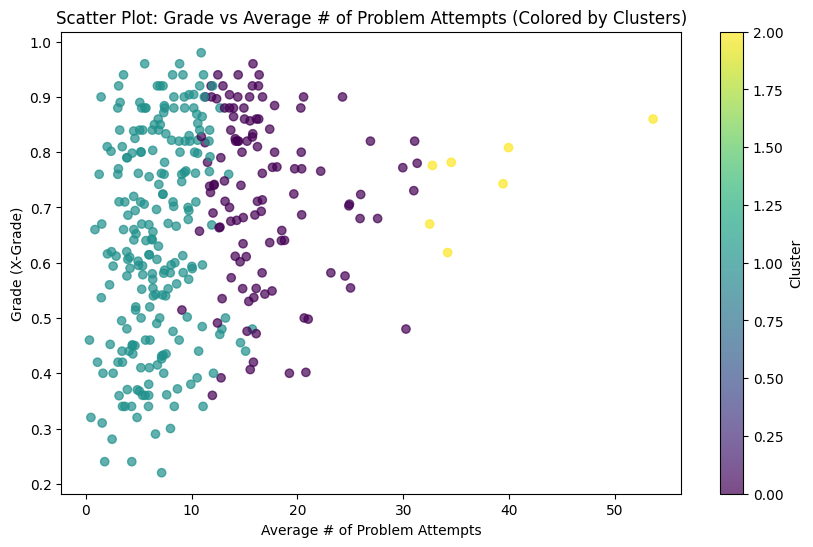

In [93]:
# Step 1: Sum the number of attempts for each student across problems
# Assuming that 'attempts_per_student_problem_pivot' contains the number of attempts for each student and problem
attempts_sum = merged_df.drop(columns=["SubjectID", "X-Grade", "Cluster"]).sum(axis=1)

# Step 2: Count the number of problems (columns) for each student
# Here we count the number of non-NaN values (problem attempts) for each student
num_problems = merged_df.drop(columns=["SubjectID", "X-Grade", "Cluster"]).notna().sum(axis=1)

# Step 3: Calculate the average number of attempts for each student
merged_df['average_problems'] = attempts_sum / num_problems

# Step 4: Plot the Grades vs Average Number of Attempts with Cluster-based coloring
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    merged_df['average_problems'],  # x-axis: Average Number of Attempts
    merged_df['X-Grade'],  # y-axis: X-Grade (Grades)
    c=merged_df['Cluster'],  # Color by Cluster
    cmap='viridis',  # You can change the colormap (e.g., 'viridis', 'plasma', 'coolwarm')
    alpha=0.7  # Transparency level for the dots
)

# Add colorbar to show which color corresponds to which cluster
plt.colorbar(scatter, label='Cluster')

# Step 5: Add labels and title to the plot
plt.xlabel("Average # of Problem Attempts")
plt.ylabel("Grade (X-Grade)")
plt.title("Scatter Plot: Grade vs Average # of Problem Attempts (Colored by Clusters)")

# Step 6: Show the plot
plt.show()



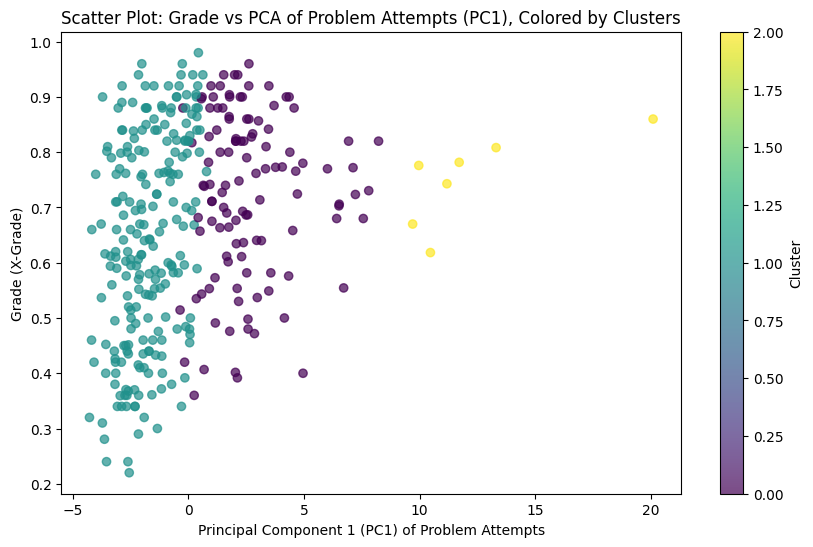

Explained variance ratio for PC1: 0.19185104147899162


In [98]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Merge the attempts dataset with subjects_table on SubjectID
merged_df = pd.merge(subjects_table, attempts_per_student_problem_pivot, on="SubjectID", how="left")
merged_df = merged_df[merged_df["X-Grade"] != 0]

# Step 2: Normalize the data (only the problem attempts)
scaler = StandardScaler()
normalized_data = scaler.fit_transform(merged_df.drop(columns=["SubjectID", "X-Grade"]))  # Drop non-relevant columns

# Step 3: Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
merged_df['Cluster'] = kmeans.fit_predict(normalized_data)

# Step 4: Apply PCA on the normalized data to reduce the problem attempts to 1 principal component
pca = PCA(n_components=1)
pc1 = pca.fit_transform(normalized_data)

# Step 5: Add the PCA result (PC1) back to the merged dataframe
merged_df['PC1'] = pc1

# Step 6: Plot the first principal component (PC1) against X-Grade, colored by cluster
plt.figure(figsize=(10, 6))
scatter = plt.scatter(merged_df['PC1'], merged_df['X-Grade'], c=merged_df['Cluster'], cmap='viridis', alpha=0.7)

# Step 7: Add color bar to show the cluster numbers
plt.colorbar(scatter, label='Cluster')

# Step 8: Add labels and title to the plot
plt.xlabel("Principal Component 1 (PC1) of Problem Attempts")
plt.ylabel("Grade (X-Grade)")
plt.title("Scatter Plot: Grade vs PCA of Problem Attempts (PC1), Colored by Clusters")

# Step 9: Show the plot
plt.show()

# Optionally, print the explained variance ratio to understand how much variance is explained by PC1
print(f"Explained variance ratio for PC1: {pca.explained_variance_ratio_[0]}")
